UM MSBA - BGEN

# Week 9 Independent Lab: Inferential Statistics
---
    Author: Ellery Bresler
    Course: BGEN632 Grad. Intro. to Python
    Term: Spring 2025
    Date: April 28, 2025


## 	&#x1f4bb; New System & Employee Usage &#x1f4bb;

I will practice implementing statistical approaches in Python using the [ect_data.txt](/data/ect_data.txt) dataset. This dataset represents an assessment of employees’ adoption of a new system within an organization. Specifically, the dataset contains responses to questionnaire items about attitudes toward a system, intention to use a system, perceived usefulness of the system, and satisfaction with the system.

#### Import Modules 

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts # for QQ plot
from scipy.stats import pearsonr # correlation p-values
from sklearn.linear_model import LinearRegression # regression output
import statsmodels.formula.api as smf # ols regression

#### Set Working Directory & Accessing Data 

In [2]:
os.chdir("/Users/ElleryBresler/Documents/GitHub/week9labs/data")  # change this to your filepath


ect_data = pd.read_csv('ect_data.txt', delimiter='\t')
ect_data.to_csv('ect_data.csv', index=False)

#### Linear and Multiple Regression
* Using `intent1_01` as the target variable, create a regression model using only 5 of the other numerical variables
  * Do not include `intent1_02`, `intent1_03`, and `intent1_04` as independent variables
* Assess the validity of the assumptions of 
  * linearity,
  * collinearity,
  * homoscedasticity,
  * independence,
  * and normality.
* Assess your model's F-test and T-tests. 
  * Which variables are significant? Based on what assessment? 
  * Choose two significant variables. From a business perspective, why are they significant?
* Provide the equation for your model and interpret the results.


In [6]:
ect_data.info()#getting basic information about file

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   attitude1_01  201 non-null    int64
 1   attitude1_02  201 non-null    int64
 2   attitude1_03  201 non-null    int64
 3   attitude1_04  201 non-null    int64
 4   intent1_01    201 non-null    int64
 5   intent1_02    201 non-null    int64
 6   intent1_03    201 non-null    int64
 7   intent1_04    201 non-null    int64
 8   peruse01      201 non-null    int64
 9   peruse02      201 non-null    int64
 10  peruse03      201 non-null    int64
 11  peruse04      201 non-null    int64
 12  satis01       201 non-null    int64
 13  satis02       201 non-null    int64
 14  satis03       201 non-null    int64
 15  satis04       201 non-null    int64
dtypes: int64(16)
memory usage: 25.3 KB


In [7]:
lin_reg_2 = smf.ols('intent1_01 ~ attitude1_01 + attitude1_02 + peruse01 + peruse02 + satis01', ect_data).fit()

lin_reg_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             intent1_01   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     45.01
Date:                Mon, 28 Apr 2025   Prob (F-statistic):           9.38e-31
Time:                        21:25:53   Log-Likelihood:                -211.54
No. Observations:                 201   AIC:                             435.1
Df Residuals:                     195   BIC:                             454.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.9931      0.354      2.808      0.005       0.296       1.691
attitude1_01     0.3127      0.095      3.285      0.001       0.125       0.500
attitude1_02     0.1529      0.076      2.014      0.045       0.003       0.303
peruse01         0.2427      0.072      3.374      0.001       0.101       0.385
peruse02        -0.0165      0.066     -0.250      0.803      -0.147       0.114
satis01          0.1885      0.056      3.378      0.001       0.078       0.299
==============================================================================
Omnibus:                       62.562   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              299.131
Skew:                          -1.101   Prob(JB):                     1.11e-65
Kurtosis:                       8.556   Cond. No.                         94.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Assess Linearity 

<Axes: xlabel='attitude1_01', ylabel='intent1_01'>

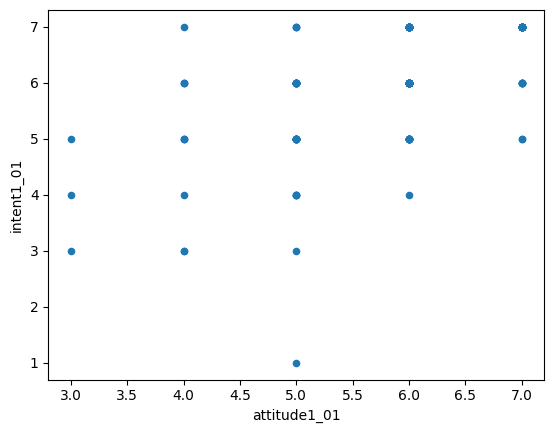

In [13]:
ect_data.plot.scatter(x='attitude1_01', y='intent1_01')

<Axes: xlabel='attitude1_02', ylabel='intent1_01'>

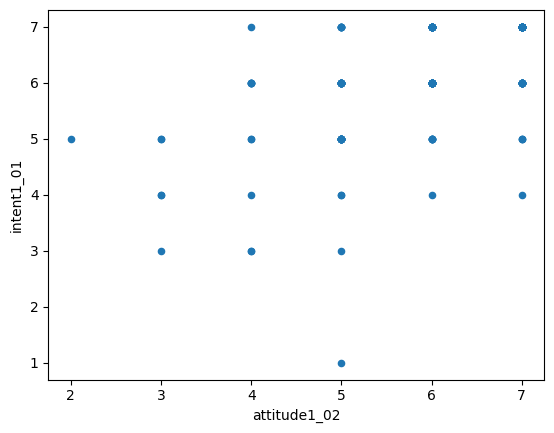

In [14]:
ect_data.plot.scatter(x='attitude1_02', y='intent1_01')

<Axes: xlabel='peruse01', ylabel='intent1_01'>

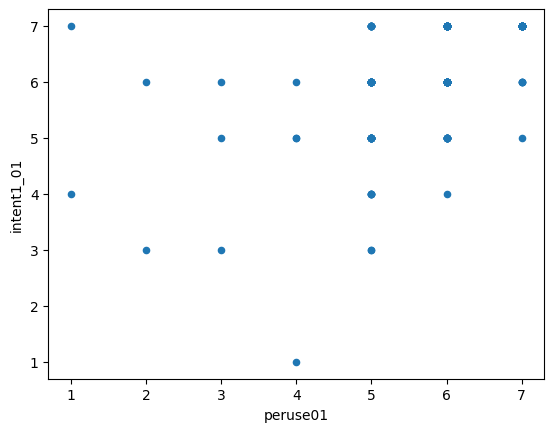

In [15]:
ect_data.plot.scatter(x='peruse01', y='intent1_01')

<Axes: xlabel='peruse02', ylabel='intent1_01'>

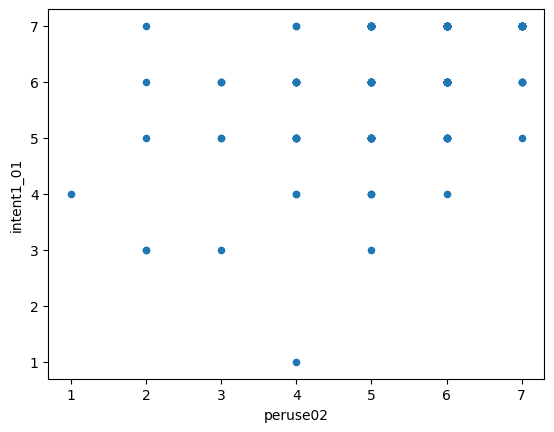

In [16]:
ect_data.plot.scatter(x='peruse02', y='intent1_01')

<Axes: xlabel='satis01', ylabel='intent1_01'>

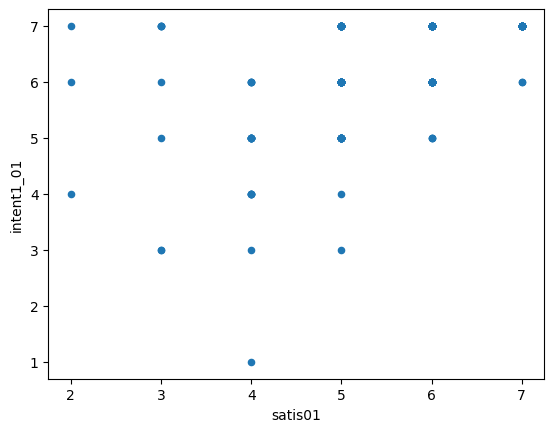

In [17]:
ect_data.plot.scatter(x='satis01', y='intent1_01')

##### Assess Collinearity

In [21]:
# use the sklearn library for regression
lin_reg_1 = LinearRegression(fit_intercept=True)

# calculate VIF for attitude1_01
lin_reg_1.fit(ect_data[['attitude1_02', 'peruse01', 'peruse02', 'satis01']], ect_data.attitude1_01)
vif1 = 1/(1 - lin_reg_1.score(ect_data[['attitude1_02', 'peruse01', 'peruse02', 'satis01']], ect_data.attitude1_01))

# calculate VIF for attitude1_02
lin_reg_1.fit(ect_data[['attitude1_01', 'peruse01', 'peruse02', 'satis01']], ect_data.attitude1_02)
vif2 = 1/(1 - lin_reg_1.score(ect_data[['attitude1_01', 'peruse01', 'peruse02', 'satis01']], ect_data.attitude1_02))

# calculate VIF for peruse01
lin_reg_1.fit(ect_data[['attitude1_01', 'attitude1_02', 'peruse02', 'satis01']], ect_data.peruse01)
vif3 = 1/(1 - lin_reg_1.score(ect_data[['attitude1_01', 'attitude1_02', 'peruse02', 'satis01']], ect_data.peruse01))

# calculate VIF for peruse02
lin_reg_1.fit(ect_data[['attitude1_01', 'attitude1_02', 'peruse01', 'satis01']], ect_data.peruse02)
vif4 = 1/(1 - lin_reg_1.score(ect_data[['attitude1_01', 'attitude1_02', 'peruse01', 'satis01']], ect_data.peruse02))

# calculate VIF for satis01
lin_reg_1.fit(ect_data[['attitude1_01', 'attitude1_02', 'peruse01', 'peruse02']], ect_data.satis01)
vif5 = 1/(1 - lin_reg_1.score(ect_data[['attitude1_01', 'attitude1_02', 'peruse01', 'peruse02']], ect_data.satis01))

# output VIF scores
print('VIF attitude1_01: ', vif1,
        '\nVIF attitude1_02: ', vif2,
        '\nVIF peruse01: ', vif3,
        '\nVIF peruse02: ', vif4,
        '\nVIF satis01: ', vif5)

VIF attitude1_01:  3.2040269048172405 
VIF attitude1_02:  2.6810446541605515 
VIF peruse01:  2.4208245725887365 
VIF peruse02:  2.6395332556541997 
VIF satis01:  1.5728091474118788


##### Assess homoscedasticity

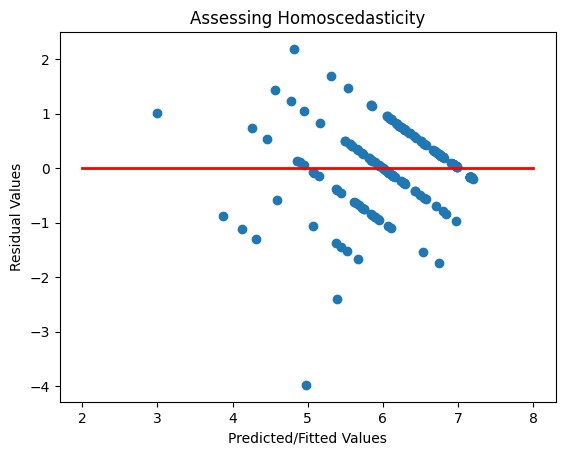

In [25]:
lin_reg_2 = smf.ols('intent1_01 ~ attitude1_01 + attitude1_02 + peruse01 + peruse02 + satis01', ect_data).fit()

# assess homoscedasticity
plt.scatter(lin_reg_2.fittedvalues, lin_reg_2.resid)
plt.xlabel('Predicted/Fitted Values')
plt.ylabel('Residual Values')
plt.title('Assessing Homoscedasticity')
plt.plot([2, 8],[0, 0], 'red', lw=2)   # add red horizontal line
plt.show()

##### Assess Independence

In [26]:
lin_reg_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             intent1_01   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     45.01
Date:                Mon, 28 Apr 2025   Prob (F-statistic):           9.38e-31
Time:                        21:59:01   Log-Likelihood:                -211.54
No. Observations:                 201   AIC:                             435.1
Df Residuals:                     195   BIC:                             454.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.9931      0.354      2.808      0.005       0.296       1.691
attitude1_01     0.3127      0.095      3.285      0.001       0.125       0.500
attitude1_02     0.1529      0.076      2.014      0.045       0.003       0.303
peruse01         0.2427      0.072      3.374      0.001       0.101       0.385
peruse02        -0.0165      0.066     -0.250      0.803      -0.147       0.114
satis01          0.1885      0.056      3.378      0.001       0.078       0.299
==============================================================================
Omnibus:                       62.562   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              299.131
Skew:                          -1.101   Prob(JB):                     1.11e-65
Kurtosis:                       8.556   Cond. No.                         94.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Assess Normality

((array([-2.70235077, -2.39300644, -2.21670641, -2.09047253, -1.99075721,
         -1.90762425, -1.83590295, -1.77254445, -1.71559368, -1.66371874,
         -1.61596971, -1.57164427, -1.53020786, -1.49124379, -1.45442067,
         -1.41947039, -1.38617282, -1.35434495, -1.32383285, -1.29450578,
         -1.26625169, -1.2389738 , -1.21258791, -1.18702027, -1.1622059 ,
         -1.13808725, -1.11461308, -1.09173755, -1.06941949, -1.04762177,
         -1.02631079, -1.005456  , -0.98502958, -0.96500611, -0.94536226,
         -0.92607659, -0.90712937, -0.88850233, -0.87017859, -0.85214246,
         -0.83437937, -0.81687572, -0.79961884, -0.78259687, -0.76579869,
         -0.74921388, -0.73283263, -0.71664571, -0.70064443, -0.68482057,
         -0.66916635, -0.65367443, -0.63833783, -0.62314992, -0.60810442,
         -0.59319534, -0.57841696, -0.56376385, -0.5492308 , -0.53481284,
         -0.52050522, -0.50630336, -0.49220289, -0.47819962, -0.4642895 ,
         -0.45046865, -0.43673331, -0.

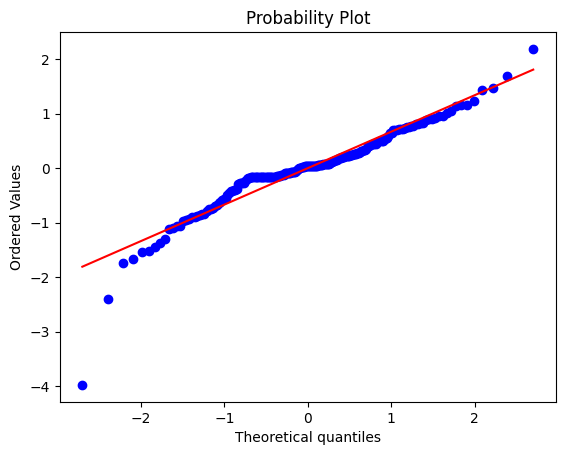

In [27]:
sts.probplot(lin_reg_2.resid , dist="norm", plot=plt)

##### Assess your model's F-test and T-tests.
* Which variables are significant? Based on what assessment?
  
Answer: Looks like attitude1_01, Attiture1_02, peruse01, & satis01 are significant based on the fact that the p-value is less than 0.05. Peruse02 is not significant.

  * Choose two significant variables. From a business perspective, why are they significant?

    
Answer: peruse01 & satis01. These appear to have the highest t-value and lowest p-value. They are statistically significant. Direct changes to those will directly impact intent1_01.

* Provide the equation for your model and interpret the results.

In [28]:
lin_reg_2 = smf.ols('intent1_01 ~ attitude1_01 + attitude1_02 + peruse01 + peruse02 + satis01', ect_data).fit()

lin_reg_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             intent1_01   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     45.01
Date:                Mon, 28 Apr 2025   Prob (F-statistic):           9.38e-31
Time:                        22:03:22   Log-Likelihood:                -211.54
No. Observations:                 201   AIC:                             435.1
Df Residuals:                     195   BIC:                             454.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.9931      0.354      2.808      0.005       0.296       1.691
attitude1_01     0.3127      0.095      3.285      0.001       0.125       0.500
attitude1_02     0.1529      0.076      2.014      0.045       0.003       0.303
peruse01         0.2427      0.072      3.374      0.001       0.101       0.385
peruse02        -0.0165      0.066     -0.250      0.803      -0.147       0.114
satis01          0.1885      0.056      3.378      0.001       0.078       0.299
==============================================================================
Omnibus:                       62.562   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              299.131
Skew:                          -1.101   Prob(JB):                     1.11e-65
Kurtosis:                       8.556   Cond. No.                         94.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""